<a href="https://colab.research.google.com/github/Krzesimir13/DataQuest/blob/main/covid_countries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Coronavirus statistics


The project aims at show some statistics about Coronavirus in 2020. The results will be easy-to-understand for the broader audience.


---



## 0. Preparation of the environment
Import of libraries and the dataset from MyDrive.

In [16]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
datasets = Path('/content/drive/MyDrive/Colab Notebooks/Datasets')

Mounted at /content/drive


In [18]:
file_name = 'top20_deathtoll.csv'
raw_data = pd.read_csv(Path.joinpath(datasets, file_name))
data = raw_data.copy()

In [19]:
file_part_2 = 'covid_avg_deaths.csv'
raw_usa = pd.read_csv(Path.joinpath(datasets, file_part_2))
usa = raw_usa.copy()

#1. Countries with the largest numbers of deaths

In [20]:
data.head()

,Country_Other,Total_Deaths
0,Turkey,15103.0
1,Chile,15663.0
2,Belgium,17386.0
3,Indonesia,18000.0
4,Germany,19539.0


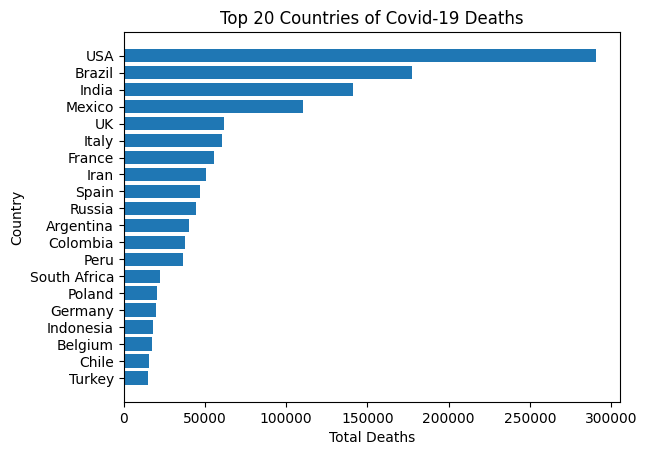

In [21]:
plt.barh(data['Country_Other'], data['Total_Deaths'])
plt.xlabel('Total Deaths')
plt.ylabel('Country')
plt.title('Top 20 Countries of Covid-19 Deaths')
plt.show()

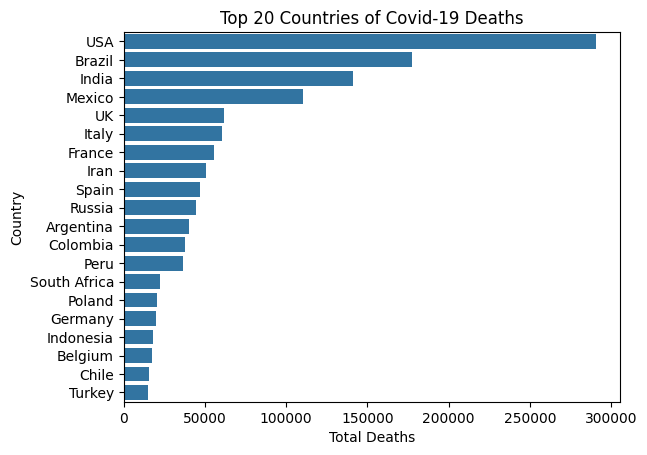

In [22]:
# @title
sns.set_style()
sns.barplot(data, y='Country_Other', x='Total_Deaths', orient='h',
            order=data['Country_Other'].iloc[::-1])
plt.xlabel('Total Deaths')
plt.ylabel('Country')
plt.title('Top 20 Countries of Covid-19 Deaths')
plt.show()

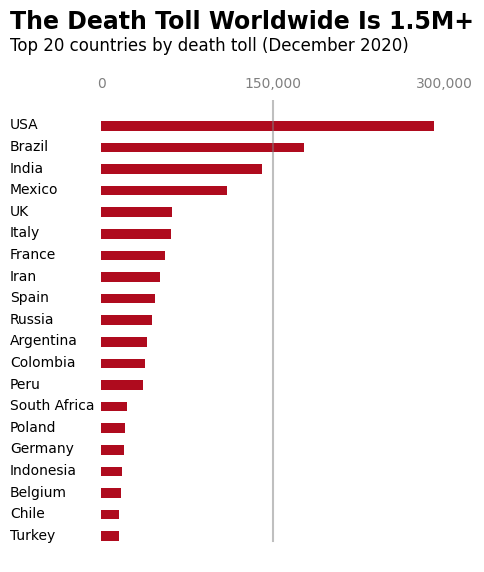

In [23]:
from numpy.random import weibull
fig, ax = plt.subplots(figsize=(4.5, 6))

ax.barh(data['Country_Other'], data['Total_Deaths'],
        height=0.45, color='#af0b1e')
for spine in ['left', 'right', 'top', 'bottom']:
  ax.spines[spine].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.set_xticks([0, 150000, 300000])
ax.set_xticklabels(['0', '150,000', '300,000'])
ax.tick_params(axis='x', colors='grey')
ax.set_yticklabels([])
for i, country in zip(range(20), data['Country_Other']):
  ax.text(x=-80000, y=i-0.15, s=country)
ax.text(x=-80000, y=23.5, s='The Death Toll Worldwide Is 1.5M+',
        weight='bold', size=17)
ax.text(x=-80000, y=22.5, s='Top 20 countries by death toll (December 2020)',
        size=12)
ax.axvline(x=150000, ymin=0.045, c='gray', alpha=0.5)
plt.show()

##2. Covid in USA

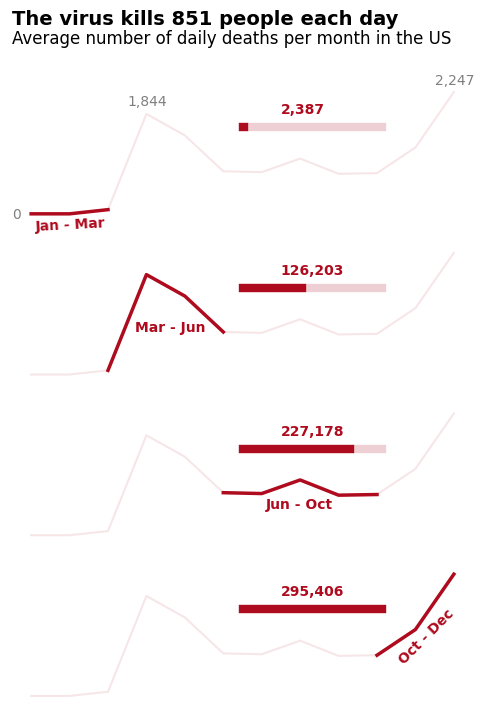

In [63]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(6, 8))
for ax in axes:
  ax.plot(usa['Month'], usa['New_deaths'], color='#af0b1e', alpha=0.1)
  ax.set_xticklabels([])
  ax.set_yticklabels([])
  ax.tick_params(bottom=False, left=False)
  for spine in ['left', 'right', 'top', 'bottom']:
    ax.spines[spine].set_visible(False)

axes[0].plot(usa['Month'][:3], usa['New_deaths'][:3],
                color='#af0b1e', linewidth=2.5)
axes[1].plot(usa['Month'][2:6], usa['New_deaths'][2:6],
                color='#af0b1e', linewidth=2.5)
axes[2].plot(usa['Month'][5:10], usa['New_deaths'][5:10],
                color='#af0b1e', linewidth=2.5)
axes[3].plot(usa['Month'][9:], usa['New_deaths'][9:],
                color='#af0b1e', linewidth=2.5)

axes[0].text(0.5, -80, '0', alpha=0.5)
axes[0].text(3.5, 2000, '1,844', alpha=0.5)
axes[0].text(11.5, 2400, '2,247', alpha=0.5)

axes[0].text(1.1, -300, 'Jan - Mar', color='#af0b1e',
         weight='bold', rotation=3)
axes[1].text(3.7, 800, 'Mar - Jun', color='#af0b1e',
         weight='bold')
axes[2].text(7.1, 500, 'Jun - Oct', color='#af0b1e',
         weight='bold')
axes[3].text(10.5, 600, 'Oct - Dec', color='#af0b1e',
         weight='bold', rotation=45)

axes[0].text(x=0.5, y=3500, s='The virus kills 851 people each day',
        weight='bold', size=14)
axes[0].text(x=0.5, y=3150,
             s='Average number of daily deaths per month in the US',
        size=12)

for ax in axes:
  ax.axhline(y=1600, xmin=0.5, xmax=0.8,
           linewidth=6, color='#af0b1e', alpha=0.1)

deaths = [2387, 126203, 227178, 295406]
proportions = [round(death/295406, 2) for death in deaths]
xmax_vals = [round(0.5 + proportion * 0.3, 3) for proportion in proportions]

for ax, xmax, death in zip(axes, xmax_vals, deaths):
    ax.axhline(y=1600, xmin=0.5, xmax=0.8,
               linewidth=6, color='#af0b1e',
               alpha=0.1)
    ax.axhline(y=1600, xmin=0.5, xmax=xmax,
               linewidth=6, color='#af0b1e')
    ax.text(x=7.5, y=1850, s=format(death, ','),
        weight='bold', color='#af0b1e')

plt.show()